In [6]:
import glob
import json
import matplotlib.pyplot as plt

In [38]:
# root_dir = "/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_views/modelnet40_images_new_12x/*/train"
root_dir = "/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_views/modelnet40_images_new_12x/*/train"
set_ = root_dir.split('/')[-1]
parent_dir = root_dir.rsplit('/',2)[0]

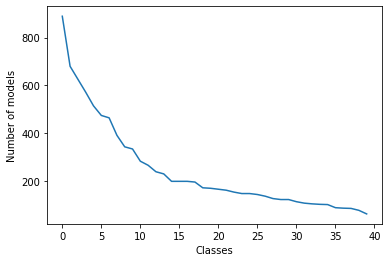

In [39]:
classnames = !ls {parent_dir}
all_files = []
num_models = []
for i in range(len(classnames)):
    files = sorted(glob.glob(parent_dir+'/'+classnames[i]+'/'+set_+'/*.png'))
    num = len(files)//12
    all_files.append(files)
    num_models.append(num)
    
plt.plot(sorted(num_models)[::-1])
plt.xlabel('Classes')
plt.ylabel('Number of models')
plt.show()
    
classnames = [shape for _,shape in sorted(zip(num_models,classnames))][::-1]
all_files = [files for _,files in sorted(zip(num_models,all_files))][::-1]

In [41]:
base = {'label_names':[],'image_names':[],'image_labels':[]}
val = {'label_names':[],'image_names':[],'image_labels':[]}
novel = {'label_names':[],'image_names':[],'image_labels':[]}
for i in range(len(classnames)):
    if i % 5 == 0:
        novel['label_names'].append(classnames[i])
        for file in all_files[i]:
            novel['image_names'].append(file)
            novel['image_labels'].append(i)
    elif i % 5 == 1:
        val['label_names'].append(classnames[i])
        for file in all_files[i]:
            val['image_names'].append(file)
            val['image_labels'].append(i)
    else:
        base['label_names'].append(classnames[i])
        for file in all_files[i]:
            base['image_names'].append(file)
            base['image_labels'].append(i)

with open('/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_views/base.json','w') as f:
    json.dump(base, f, indent=2)
    f.close()
    
with open('/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_views/val.json','w') as f:
    json.dump(val, f, indent=2)
    f.close()

with open('/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_views/novel.json','w') as f:
    json.dump(novel, f, indent=2)
    f.close()

In [40]:
# parent_dir = "/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_points/modelnet40_normal_resampled/"
parent_dir = "/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled"

In [41]:
cd {parent_dir}

/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled


In [42]:
classnames = !ls -d */
classnames

['airplane/',
 'bathtub/',
 'bed/',
 'bench/',
 'bookshelf/',
 'bottle/',
 'bowl/',
 'car/',
 'chair/',
 'cone/',
 'cup/',
 'curtain/',
 'desk/',
 'door/',
 'dresser/',
 'flower_pot/',
 'glass_box/',
 'guitar/',
 'keyboard/',
 'lamp/',
 'laptop/',
 'mantel/',
 'monitor/',
 'night_stand/',
 'person/',
 'piano/',
 'plant/',
 'radio/',
 'range_hood/',
 'sink/',
 'sofa/',
 'stairs/',
 'stool/',
 'table/',
 'tent/',
 'toilet/',
 'tv_stand/',
 'vase/',
 'wardrobe/',
 'xbox/']

In [43]:
classnames[0]

'airplane/'

In [44]:
files = sorted(glob.glob(parent_dir+'/'+classnames[0]+'/'+'/*.txt'))
files

['/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/airplane/airplane_0001.txt',
 '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/airplane/airplane_0002.txt',
 '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/airplane/airplane_0003.txt',
 '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/airplane/airplane_0004.txt',
 '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/airplane/airplane_0005.txt',
 '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/airplane/airplane_0006.txt',
 '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/airplan

classnames[0]=airplane/ num=726
classnames[1]=bathtub/ num=156
classnames[2]=bed/ num=615
classnames[3]=bench/ num=193
classnames[4]=bookshelf/ num=672
classnames[5]=bottle/ num=435
classnames[6]=bowl/ num=84
classnames[7]=car/ num=297
classnames[8]=chair/ num=989
classnames[9]=cone/ num=187
classnames[10]=cup/ num=99
classnames[11]=curtain/ num=158
classnames[12]=desk/ num=286
classnames[13]=door/ num=129
classnames[14]=dresser/ num=286
classnames[15]=flower_pot/ num=169
classnames[16]=glass_box/ num=271
classnames[17]=guitar/ num=255
classnames[18]=keyboard/ num=165
classnames[19]=lamp/ num=144
classnames[20]=laptop/ num=169
classnames[21]=mantel/ num=384
classnames[22]=monitor/ num=565
classnames[23]=night_stand/ num=286
classnames[24]=person/ num=108
classnames[25]=piano/ num=331
classnames[26]=plant/ num=340
classnames[27]=radio/ num=124
classnames[28]=range_hood/ num=215
classnames[29]=sink/ num=148
classnames[30]=sofa/ num=780
classnames[31]=stairs/ num=144
classnames[32]=stool/

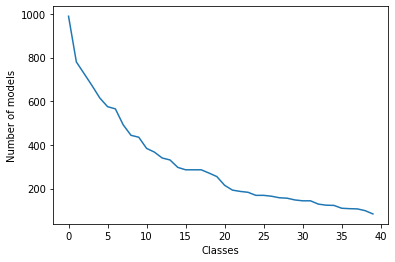

In [49]:
# directory1/  directory2/  directory3/..
classnames = !ls -d */
all_files = []
num_models = []
for i in range(len(classnames)):
    files = sorted(glob.glob(parent_dir+'/'+classnames[i]+'/'+'/*.txt'))
    num = len(files)
    all_files.append(files)
    num_models.append(num)
    # print(f"files={files} num={num}")
    print(f"classnames[{i}]={classnames[i]} num={num}")


    
# print(f"all_files={all_files} num_models={num_models}")

plt.plot(sorted(num_models)[::-1])
plt.xlabel('Classes')
plt.ylabel('Number of models')
plt.show()
    
# [::-1] >> reverse 原 sort 是 依照 類別資料數num數 小>>大 改成 大>>小 以此順序當類別標籤
classnames = [shape for _,shape in sorted(zip(num_models,classnames))][::-1]
all_files = [files for _,files in sorted(zip(num_models,all_files))][::-1]

# classnames = [shape for _,shape in zip(num_models,classnames)][::-1]
# all_files = [files for _,files in zip(num_models,all_files)][::-1]

In [51]:
sorted(num_models)[::-1]

[989,
 780,
 726,
 672,
 615,
 575,
 565,
 492,
 444,
 435,
 384,
 367,
 340,
 331,
 297,
 286,
 286,
 286,
 271,
 255,
 215,
 193,
 187,
 183,
 169,
 169,
 165,
 158,
 156,
 148,
 144,
 144,
 129,
 124,
 123,
 110,
 108,
 107,
 99,
 84]

In [50]:
classnames

['chair/',
 'sofa/',
 'airplane/',
 'bookshelf/',
 'bed/',
 'vase/',
 'monitor/',
 'table/',
 'toilet/',
 'bottle/',
 'mantel/',
 'tv_stand/',
 'plant/',
 'piano/',
 'car/',
 'night_stand/',
 'dresser/',
 'desk/',
 'glass_box/',
 'guitar/',
 'range_hood/',
 'bench/',
 'cone/',
 'tent/',
 'laptop/',
 'flower_pot/',
 'keyboard/',
 'curtain/',
 'bathtub/',
 'sink/',
 'stairs/',
 'lamp/',
 'door/',
 'radio/',
 'xbox/',
 'stool/',
 'person/',
 'wardrobe/',
 'cup/',
 'bowl/']

In [21]:
all_files

[['/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/chair/chair_0001.txt',
  '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/chair/chair_0002.txt',
  '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/chair/chair_0003.txt',
  '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/chair/chair_0004.txt',
  '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/chair/chair_0005.txt',
  '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/chair/chair_0006.txt',
  '/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/chair/chair_0007.txt',
  '/home/g111

In [45]:
base = {'label_names':[],'image_names':[],'image_labels':[]}
val = {'label_names':[],'image_names':[],'image_labels':[]}
novel = {'label_names':[],'image_names':[],'image_labels':[]}
for i in range(len(classnames)):
    if i % 5 == 0:
        novel['label_names'].append(classnames[i].rstrip("/"))
        for file in all_files[i]:
            novel['image_names'].append(file)
            novel['image_labels'].append(i)
    elif i % 5 == 1:
        val['label_names'].append(classnames[i].rstrip("/"))
        for file in all_files[i]:
            val['image_names'].append(file)
            val['image_labels'].append(i)
    else:
        base['label_names'].append(classnames[i].rstrip("/"))
        for file in all_files[i]:
            base['image_names'].append(file)
            base['image_labels'].append(i)

with open('/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_points/base.json','w') as f:
    json.dump(base, f, indent=2)
    f.close()
    
with open('/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_points/val.json','w') as f:
    json.dump(val, f, indent=2)
    f.close()

with open('/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_points/novel.json','w') as f:
    json.dump(novel, f, indent=2)
    f.close()

In [6]:
# root_dir = "/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_points/ModelNet40/*/train"
root_dir = "/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled/*/train"

set_ = root_dir.split('/')[-1]
parent_dir = root_dir.rsplit('/',2)[0]
parent_dir

'/home/g111056119/Documents/7111056426/CloserLookFewShot_3D/filelists/ModelNet40_points/modelnet40_normal_resampled'

In [7]:
classnames = !ls {parent_dir}
classnames

['airplane',
 'bathtub',
 'bed',
 'bench',
 'bookshelf',
 'bottle',
 'bowl',
 'car',
 'chair',
 'cone',
 'cup',
 'curtain',
 'desk',
 'door',
 'dresser',
 'filelist.txt',
 'flower_pot',
 'glass_box',
 'guitar',
 'keyboard',
 'lamp',
 'laptop',
 'mantel',
 'modelnet10_shape_names.txt',
 'modelnet10_test.txt',
 'modelnet10_train.txt',
 'modelnet40_shape_names.txt',
 'modelnet40_test.txt',
 'modelnet40_train.txt',
 'monitor',
 'night_stand',
 'person',
 'piano',
 'plant',
 'radio',
 'range_hood',
 'sink',
 'sofa',
 'stairs',
 'stool',
 'table',
 'tent',
 'toilet',
 'tv_stand',
 'vase',
 'wardrobe',
 'xbox']

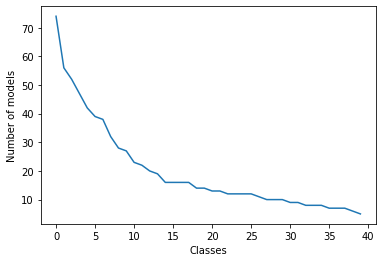

In [47]:
classnames = !ls {parent_dir}
all_files = []
num_models = []
for i in range(len(classnames)):
    files = sorted(glob.glob(parent_dir+'/'+classnames[i]+'/'+set_+'/*.binvox'))
    num = len(files)//12
    all_files.append(files)
    num_models.append(num)
    
plt.plot(sorted(num_models)[::-1])
plt.xlabel('Classes')
plt.ylabel('Number of models')
plt.show()
    
classnames = [shape for _,shape in sorted(zip(num_models,classnames))][::-1]
all_files = [files for _,files in sorted(zip(num_models,all_files))][::-1]

In [48]:
base = {'label_names':[],'image_names':[],'image_labels':[]}
val = {'label_names':[],'image_names':[],'image_labels':[]}
novel = {'label_names':[],'image_names':[],'image_labels':[]}
for i in range(len(classnames)):
    if i % 5 == 0:
        novel['label_names'].append(classnames[i])
        for file in all_files[i]:
            novel['image_names'].append(file)
            novel['image_labels'].append(i)
    elif i % 5 == 1:
        val['label_names'].append(classnames[i])
        for file in all_files[i]:
            val['image_names'].append(file)
            val['image_labels'].append(i)
    else:
        base['label_names'].append(classnames[i])
        for file in all_files[i]:
            base['image_names'].append(file)
            base['image_labels'].append(i)

with open('/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_voxels/base.json','w') as f:
    json.dump(base, f, indent=2)
    f.close()
    
with open('/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_voxels/val.json','w') as f:
    json.dump(val, f, indent=2)
    f.close()

with open('/home/rishabhgupta/CloserLookFewShot/filelists/ModelNet40_voxels/novel.json','w') as f:
    json.dump(novel, f, indent=2)
    f.close()